<a href="https://colab.research.google.com/github/giovanaribeirodefrancisco/Intelig-ncia-Artificial/blob/main/A2_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10297494, Giovana Ribeiro de Francisco' #@param {type:"string"}
Aluno2 = '10402951, Leila Akina Ino' #@param {type:"string"}
Aluno3 = '10400969, Letícia Moraes Gutierrez de Oliveira' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

*Apresente um parágrafo resumindo o que é feito neste trabalho*.

## Resumo
Este trabalho implementa algoritmos de busca em grafos para encontrar rotas entre as cidades de São Paulo e Rio de Janeiro. O estudo utiliza um grafo de 15 cidades interconectadas ao longo da rota que liga estas duas metrópoles, representando as distâncias reais entre municípios adjacentes. Inicialmente, construímos e visualizamos o grafo utilizando a biblioteca NetworkX. Em seguida, implementaremos dois algoritmos de busca: um algoritmo não-informado (BFS - Breadth-First Search) e um algoritmo informado (A* - A-Star), comparando os resultados obtidos em termos de eficiência e qualidade das rotas encontradas.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **1. Grafo das cidades (2,0)**

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

In [ ]:
# Importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

#### Definindo as cidades e suas coordenadas
Para representar adequadamente o grafo, precisamos definir as cidades e suas coordenadas geográficas (latitude e longitude). Estas coordenadas serão úteis tanto para a visualização do grafo quanto para calcular a heurística no algoritmo A* posteriormente.

In [ ]:
# Definindo as coordenadas geográficas aproximadas de cada cidade (latitude, longitude)
coordenadas = {
    "São Paulo": (-23.5505, -46.6333),
    "Campinas": (-22.9056, -47.0608),
    "São José dos Campos": (-23.1791, -45.8872),
    "Taubaté": (-23.0104, -45.5593),
    "Aparecida": (-22.8495, -45.2325),
    "Guaratinguetá": (-22.8075, -45.1927),
    "Lorena": (-22.7337, -45.1231),
    "Cachoeira Paulista": (-22.6667, -45.0158),
    "Cruzeiro": (-22.5758, -44.9692),
    "Resende": (-22.4702, -44.4509),
    "Volta Redonda": (-22.5202, -44.0996),
    "Barra Mansa": (-22.5481, -44.1710),
    "Piraí": (-22.6300, -43.8950),
    "Itaguaí": (-22.8606, -43.7801),
    "Rio de Janeiro": (-22.9068, -43.1729)
}

#### Criando o grafo com NetworkX
Utilizamos a biblioteca NetworkX para criar o grafo, adicionar os nós (cidades) com suas respectivas posições e adicionar as arestas (conexões entre cidades) com seus pesos (distâncias em quilômetros):

In [ ]:
# Criando o grafo
G = nx.Graph()

# Adicionando nós com suas posições
for cidade, coord in coordenadas.items():
    G.add_node(cidade, pos=coord)

# Adicionando arestas com distâncias (em km)
arestas = [
    ("São Paulo", "Campinas", 90),
    ("São Paulo", "São José dos Campos", 97),
    ("São José dos Campos", "Taubaté", 43),
    ("São José dos Campos", "Campinas", 127),
    ("Taubaté", "Aparecida", 42),
    ("Aparecida", "Guaratinguetá", 11),
    ("Guaratinguetá", "Lorena", 16),
    ("Lorena", "Cachoeira Paulista", 15),
    ("Cachoeira Paulista", "Cruzeiro", 10),
    ("Cruzeiro", "Resende", 35),
    ("Resende", "Volta Redonda", 43),
    ("Volta Redonda", "Barra Mansa", 7),
    ("Barra Mansa", "Piraí", 26),
    ("Piraí", "Itaguaí", 46),
    ("Itaguaí", "Rio de Janeiro", 70)
]

# Adicionando as arestas ao grafo
G.add_weighted_edges_from([(u, v, w) for u, v, w in arestas])

#### Visualizando o grafo
Para visualizar o grafo, extraímos as posições dos nós e utilizamos as funções de plotagem do NetworkX para mostrar as cidades e as distâncias entre elas:

In [ ]:
# Extraindo posições dos nós para visualização
pos = nx.get_node_attributes(G, 'pos')

# Plotando o grafo
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Adicionando pesos às arestas no plot
edge_labels = {(u, v): f"{G[u][v]['weight']} km" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo de Cidades entre São Paulo e Rio de Janeiro", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

> ## **1.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

Número de cidades no grafo: 15
Número de conexões: 15
Distância total de todas as conexões: 678 km

Distâncias entre cidades adjacentes:
São Paulo -> Campinas: 90 km
São Paulo -> São José dos Campos: 97 km
Campinas -> São José dos Campos: 127 km
São José dos Campos -> Taubaté: 43 km
Taubaté -> Aparecida: 42 km
Aparecida -> Guaratinguetá: 11 km
Guaratinguetá -> Lorena: 16 km
Lorena -> Cachoeira Paulista: 15 km
Cachoeira Paulista -> Cruzeiro: 10 km
Cruzeiro -> Resende: 35 km
Resende -> Volta Redonda: 43 km
Volta Redonda -> Barra Mansa: 7 km
Barra Mansa -> Piraí: 26 km
Piraí -> Itaguaí: 46 km
Itaguaí -> Rio de Janeiro: 70 km


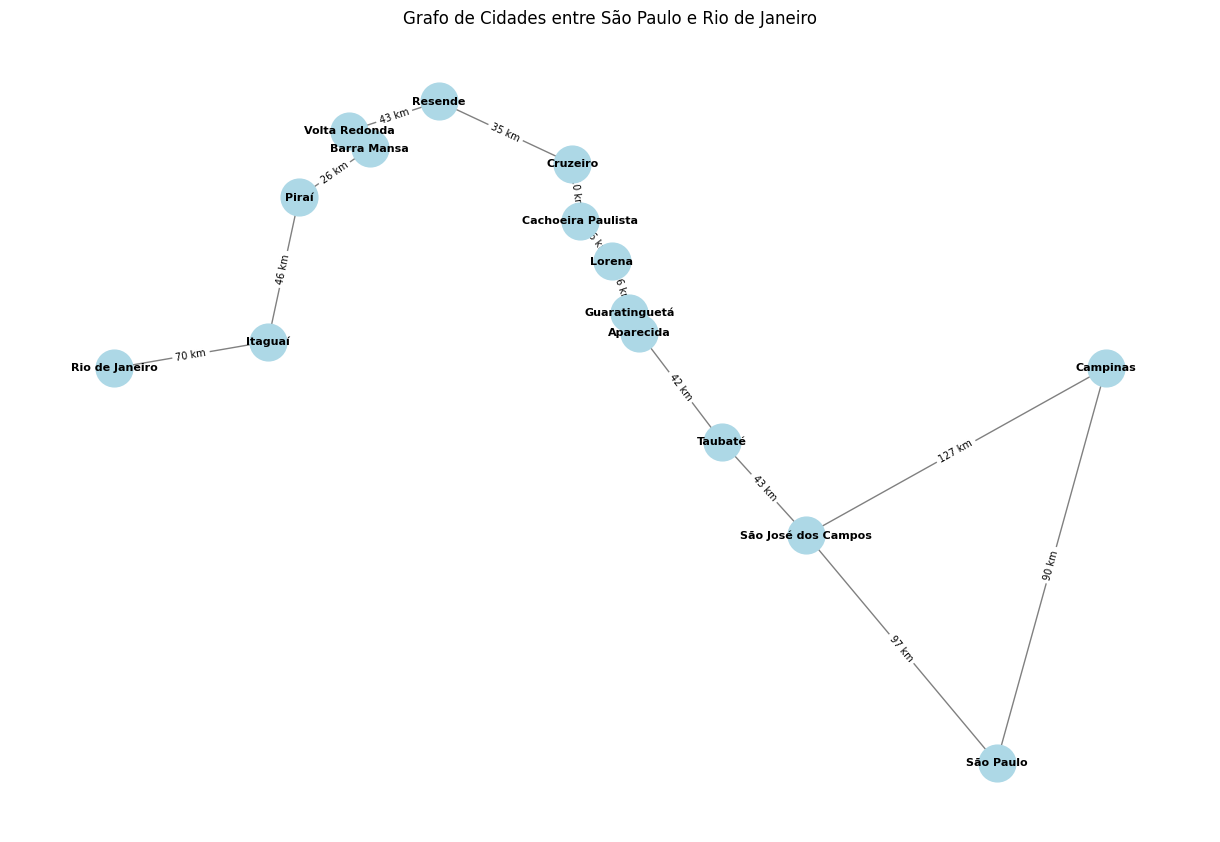

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Coordenadas das cidades (latitude, longitude)
coordenadas = {
    "São Paulo": (-23.5505, -46.6333),
    "Campinas": (-22.9064, -47.0616),
    "São José dos Campos": (-23.1791, -45.8872),
    "Taubaté": (-23.0268, -45.5557),
    "Aparecida": (-22.8495, -45.2325),
    "Guaratinguetá": (-22.8167, -45.1926),
    "Lorena": (-22.7328, -45.1238),
    "Cachoeira Paulista": (-22.6665, -44.9991),
    "Cruzeiro": (-22.5734, -44.9689),
    "Resende": (-22.4717, -44.4469),
    "Volta Redonda": (-22.5202, -44.0950),
    "Barra Mansa": (-22.5481, -44.1752),
    "Piraí": (-22.6281, -43.8981),
    "Itaguaí": (-22.8636, -43.7758),
    "Rio de Janeiro": (-22.9068, -43.1729)
}

# Criando o grafo
G = nx.Graph()

# Adicionando nós com suas posições
for cidade, coord in coordenadas.items():
    G.add_node(cidade, pos=coord)

# Adicionando arestas com distâncias (em km)
arestas = [
    ("São Paulo", "Campinas", 90),
    ("São Paulo", "São José dos Campos", 97),
    ("São José dos Campos", "Taubaté", 43),
    ("São José dos Campos", "Campinas", 127),
    ("Taubaté", "Aparecida", 42),
    ("Aparecida", "Guaratinguetá", 11),
    ("Guaratinguetá", "Lorena", 16),
    ("Lorena", "Cachoeira Paulista", 15),
    ("Cachoeira Paulista", "Cruzeiro", 10),
    ("Cruzeiro", "Resende", 35),
    ("Resende", "Volta Redonda", 43),
    ("Volta Redonda", "Barra Mansa", 7),
    ("Barra Mansa", "Piraí", 26),
    ("Piraí", "Itaguaí", 46),
    ("Itaguaí", "Rio de Janeiro", 70)
]

# Adicionando as arestas ao grafo
G.add_weighted_edges_from([(u, v, w) for u, v, w in arestas])

# Extraindo informações do grafo
num_cidades = G.number_of_nodes()
num_conexoes = G.number_of_edges()
total_distancia = sum(G[u][v]['weight'] for u, v in G.edges())

print(f"Número de cidades no grafo: {num_cidades}")
print(f"Número de conexões: {num_conexoes}")
print(f"Distância total de todas as conexões: {total_distancia} km")

# Exibindo todas as distâncias entre cidades adjacentes
print("\nDistâncias entre cidades adjacentes:")
for u, v, data in G.edges(data=True):
    print(f"{u} -> {v}: {data['weight']} km")

# Visualizando o grafo
plt.figure(figsize=(12, 8))
pos = nx.get_node_attributes(G, 'pos')

# Ajustando coordenadas para visualização (invertendo longitude para parecer com mapa)
pos_vis = {city: (-lon, lat) for city, (lat, lon) in pos.items()}

nx.draw(G, pos_vis, with_labels=True, node_size=700, node_color='lightblue',
        font_size=8, font_weight='bold', edge_color='gray')

# Adicionando pesos nas arestas
edge_labels = {(u, v): f"{d['weight']} km" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos_vis, edge_labels=edge_labels, font_size=7)

plt.title("Grafo de Cidades entre São Paulo e Rio de Janeiro")
plt.show()

#### Cálculo da distância direta entre São Paulo e Rio de Janeiro
Calculamos a distância direta (euclidiana) entre São Paulo e Rio de Janeiro utilizando a fórmula de Haversine, que considera a curvatura da Terra. Esta distância será útil como heurística para o algoritmo A*:

In [14]:
import numpy as np

# Definindo as coordenadas das cidades (latitude, longitude)
coordenadas = {
    "São Paulo": (-23.5505, -46.6333),
    "Rio de Janeiro": (-22.9068, -43.1729)
}

# Calculando a distância direta (euclidiana) entre SP e RJ
sp_coords = coordenadas["São Paulo"]
rj_coords = coordenadas["Rio de Janeiro"]

# Convertendo coordenadas para radianos
lat1, lon1 = np.radians(sp_coords[0]), np.radians(sp_coords[1])
lat2, lon2 = np.radians(rj_coords[0]), np.radians(rj_coords[1])

# Raio médio da Terra em km
R = 6371.0

# Fórmula de Haversine para cálculo da distância
dlon = lon2 - lon1
dlat = lat2 - lat1
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distancia_direta = R * c

print(f"Distância em linha reta (Haversine) entre São Paulo e Rio de Janeiro: {distancia_direta:.2f} km")

Distância em linha reta (Haversine) entre São Paulo e Rio de Janeiro: 360.75 km


#### Algoritmo informado a ser implementado na entrega final
Para a entrega final, será implementado o algoritmo A* (A-Star) como algoritmo de busca informada:

O algoritmo A* é uma extensão do algoritmo de Dijkstra que usa heurísticas para guiar a busca em direção ao objetivo de forma mais eficiente.
A função de avaliação f(n) = g(n) + h(n), onde: - g(n) é o custo real do caminho do nó inicial até o nó n, - h(n) é a heurística que estima o custo do nó n até o objetivo.
Para este problema, a heurística será a distância em linha reta (distância euclidiana) entre a cidade atual e o destino (Rio de Janeiro), calculada a partir das coordenadas geográficas.

## **2. BFS, Breadth-First Search(2,0)**

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

## **3. Busca Informada (5,0)**

*Indique aqui em um texto o algoritmo de Busca Informada escolhido e o motivo da escolha.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas empregadas em formato ABNT.

NETWORKX. NetworkX documentation. Disponível em: https://networkx.org/documentation/stable/. Acesso em: 18 mar. 2025.

RICWTK. Algoritmos de busca. Disponível em: https://ricwtk.github.io/ai-labs/lab2/. Acesso em: 18 mar. 2025.

DERKOWSKI, Jake. Romania Problem AI – Reference Implementation. Disponível em: https://github.com/JakeDerkowski96/RomaniaProblemAI. Acesso em: 18 mar. 2025.

GOOGLE MAPS. Coordenadas geográficas das cidades. Disponível em: https://www.google.com/maps. Acesso em: 18 mar. 2025.

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
